VMC optimization in CASINO can be performed only a fixed number of steps.
Therefore it is important to estimate what maximum number of optimization steps is necessary.
0-step means VMC energy before optimization, n-th step means VMC energy after n-th optimization step.

In [1]:
import re
import os
import numpy as np
from math import sqrt
from functools import partial
import matplotlib.pyplot as plt

def vmc_energy(*path):
    """Get VMC energy without JASTROW optimisation.
     -152.988424660763 +/- 0.003047553900      Correlation time method
    """

    regexp = re.compile(' (?P<energy>[-+]?\d+\.\d+) \+/- (?P<energy_error>[-+]?\d+\.\d+)      Correlation time method')

    with open(os.path.join(*path, 'out'), 'r') as vmc_out:
        result = re.findall(regexp, vmc_out.read())
        return list(map(list, map(partial(map, float), result)))

In [2]:
energy = {}
x = {}
y = {}
yerr = {}
z_test = {}
for atom in ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Ar', 'Kr']:    
    energy[atom] = (vmc_energy(atom, 'VMC_OPT', 'emin', '8_8_44_simple'))
    x[atom] = list(range(len(energy[atom])))
    y[atom] = [E[0] for E in energy[atom]]
    yerr[atom] = [E[1] for E in energy[atom]]
    z_test[atom] = [abs(E0[0] - E1[0])/sqrt(E0[1]**2 + E1[1]**2) for E0, E1 in zip(energy[atom], energy[atom][1:])]

%matplotlib notebook

def VMC_plot(atom, ymin, ymax):    
    fig, axes1 = plt.subplots(num='{} VMC energy vs opt. step'.format(atom))
    axes1.errorbar(x[atom], y[atom], yerr[atom], marker='o', ms=7, capsize=5, ls='none')
    axes1.set_ylim(ymin=ymin, ymax=ymax)
    axes1.set_xlabel('VMC optimization step')
    axes1.set_ylabel('VMC energy')
    axes1.minorticks_on()
    axes1.ticklabel_format(useOffset=False)
    axes1.grid(which='major', linestyle='-', linewidth=0.5, color='black')
    axes1.grid(which='minor', linestyle=':', linewidth=0.5, color='black')
    axes1.tick_params(which='both', top=False, left=False, right=False, bottom=False)
    axes2 = axes1.twinx()
    axes2.plot(np.arange(0.5, len(energy[atom])-1), z_test[atom], 'r.', linestyle=':')
    axes2.set_ylim(ymin=0.0, ymax=4.0)
    axes2.set_ylabel('two-sample z-score', color='r')
    axes2.tick_params('y', colors='r')
    fig.tight_layout()
    fig.show()

<IPython.core.display.Javascript object>


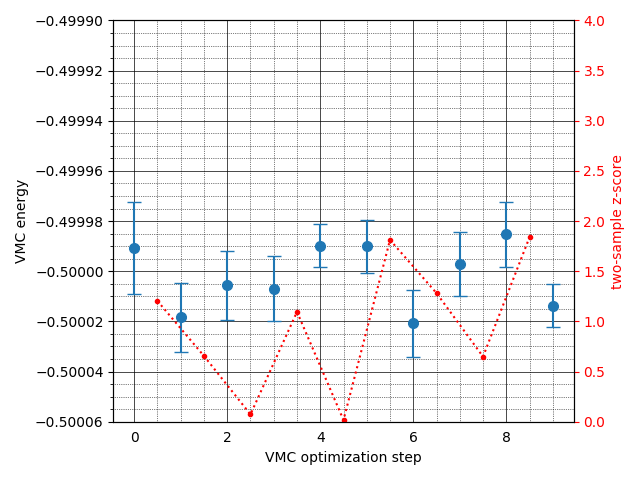

In [3]:
VMC_plot('H', ymin=-0.50006, ymax=-0.49990)

<IPython.core.display.Javascript object>


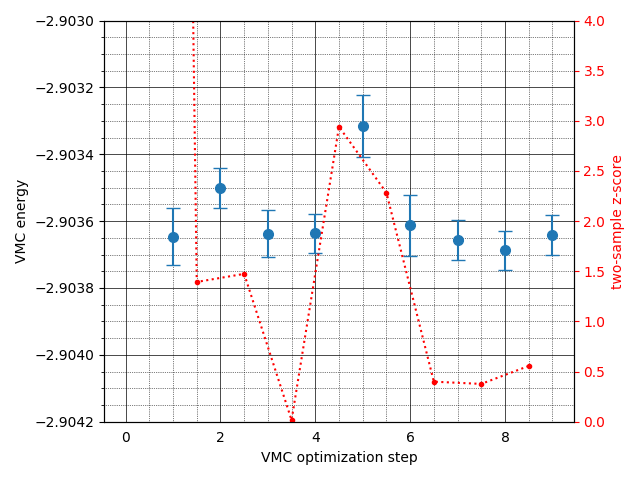

In [4]:
VMC_plot('He', ymin=-2.9042, ymax=-2.9030)

<IPython.core.display.Javascript object>


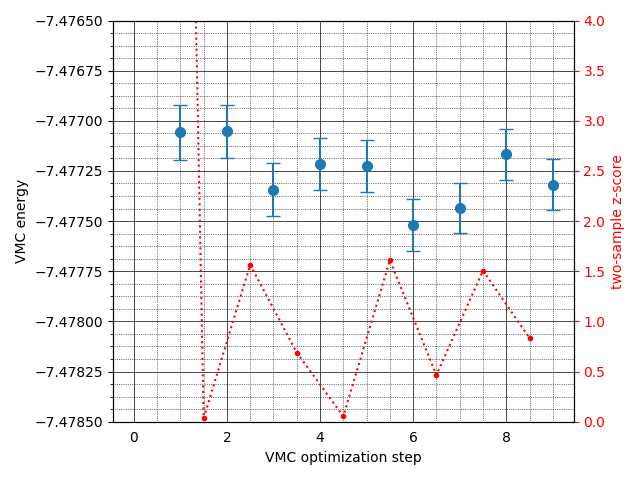

In [5]:
VMC_plot('Li', ymin=-7.4785, ymax=-7.4765)

<IPython.core.display.Javascript object>


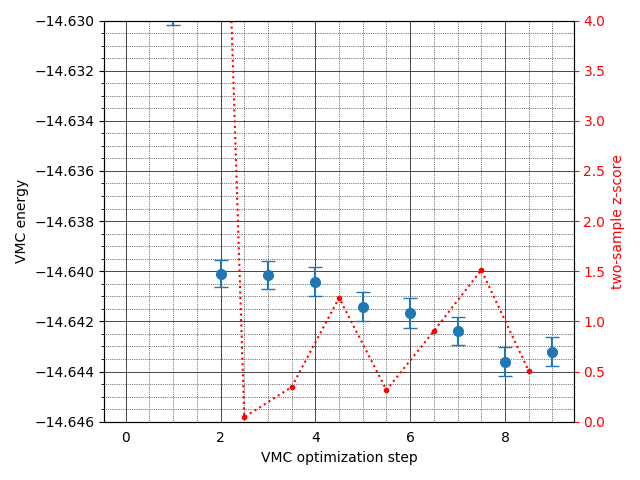

In [6]:
VMC_plot('Be', ymin=-14.646, ymax=-14.63)

<IPython.core.display.Javascript object>


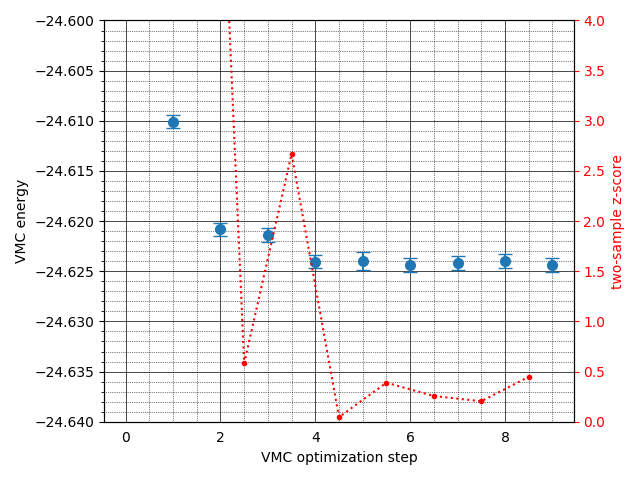

In [7]:
VMC_plot('B', ymin=-24.64, ymax=-24.60)

<IPython.core.display.Javascript object>


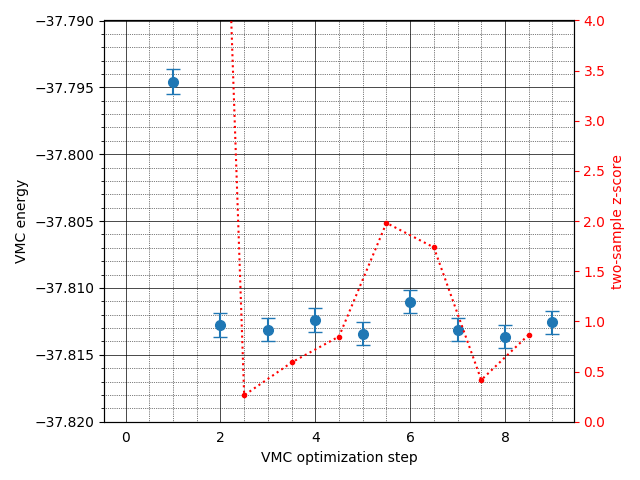

In [8]:
VMC_plot('C', ymin=-37.82, ymax=-37.79)

<IPython.core.display.Javascript object>


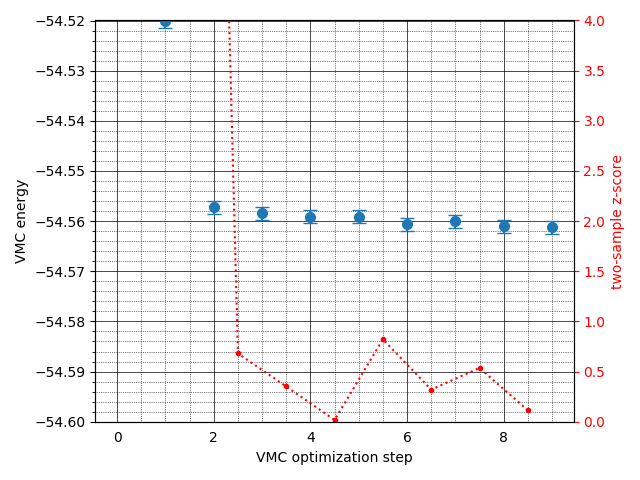

In [9]:
VMC_plot('N', ymin=-54.60, ymax=-54.52)

<IPython.core.display.Javascript object>


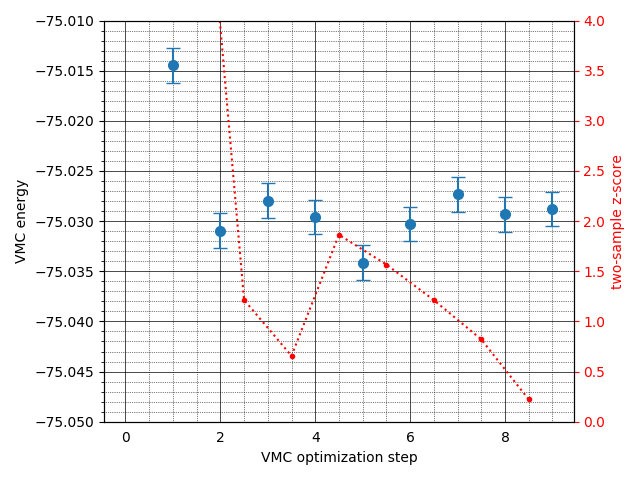

In [10]:
VMC_plot('O', ymin=-75.05, ymax=-75.01)

<IPython.core.display.Javascript object>


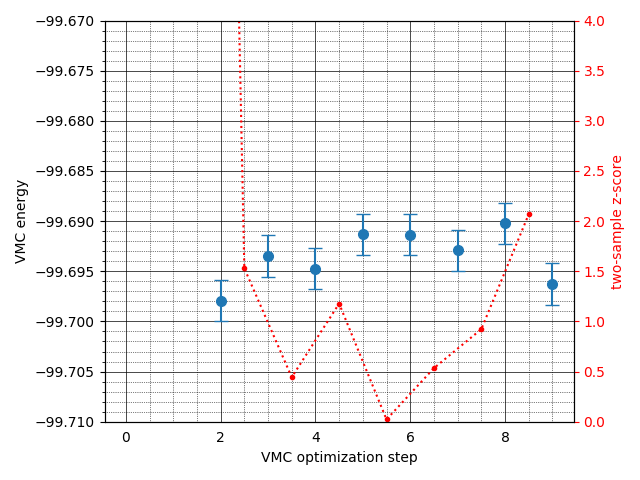

In [11]:
VMC_plot('F', ymin=-99.71, ymax=-99.67)

<IPython.core.display.Javascript object>


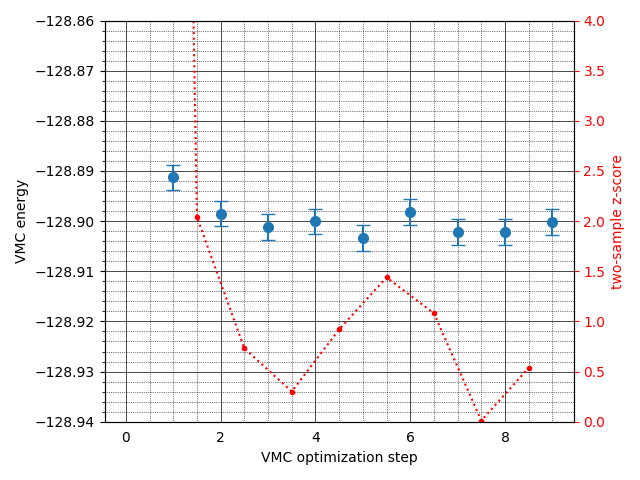

In [12]:
VMC_plot('Ne', ymin=-128.94, ymax=-128.86)

<IPython.core.display.Javascript object>


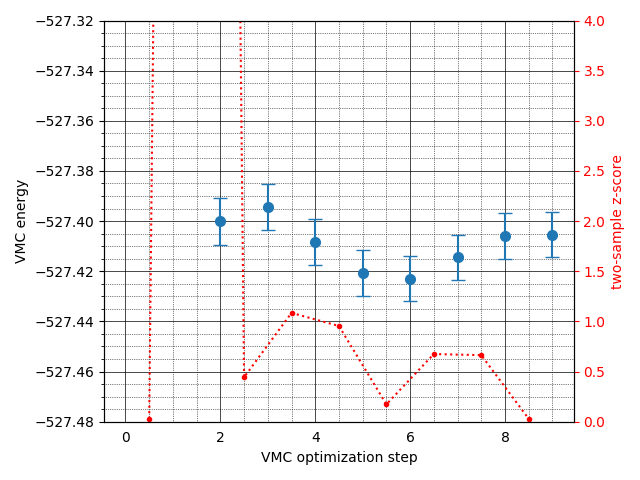

In [13]:
VMC_plot('Ar', ymin=-527.48, ymax=-527.32)

<IPython.core.display.Javascript object>


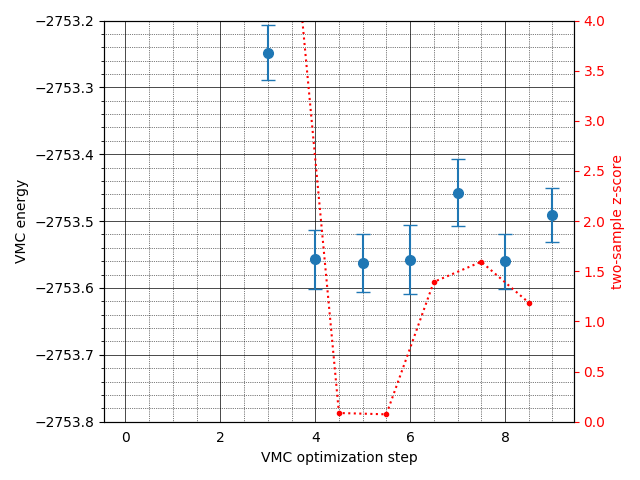

In [14]:
VMC_plot('Kr', ymin=-2753.8, ymax=-2753.2)